# Modeling - XGBoost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,RocCurveDisplay

## Import Datasets

In [2]:
X_train = pd.read_pickle("data/model_input/X_train.pkl")[:50000]
y_train = pd.read_pickle("data/model_input/y_train.pkl")[:50000]
X_test = pd.read_pickle("data/model_input/X_test.pkl")[:10000]
y_test = pd.read_pickle("data/model_input/y_test.pkl")[:10000]

## Hyperparameter Tuning

In [6]:
grid = {
    'min_child_weight': [1, 5, 10, 15],
    'gamma': [0.5, 1, 1.5, 2, 3, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 7]
}

In [7]:
xgb = XGBClassifier()
clf = GridSearchCV(xgb, grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 3, 5],
                         'max_depth': [3, 4, 5, 7],
                         'min_child_weight': [1, 5, 10, 15]})

In [9]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
clf.best_params_

{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 7, 'min_child_weight': 1}

## Evaluation

In [11]:
clf.score(X_test, y_test)

0.905

In [12]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.6592539454806313

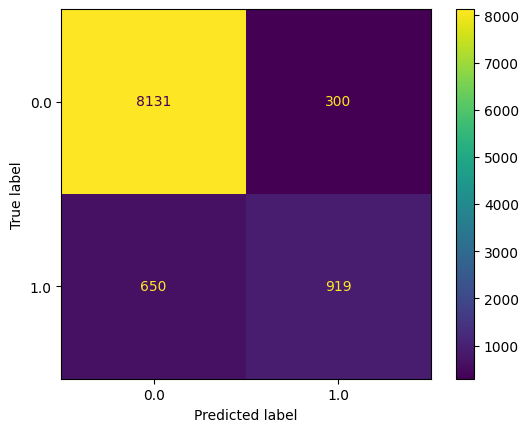

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
plt.show()

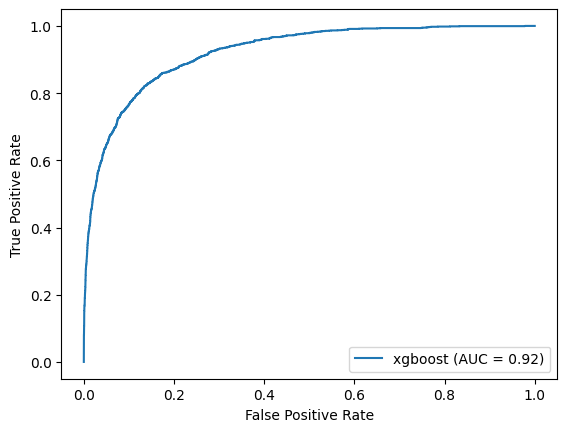

In [14]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='xgboost').plot()
plt.show()